## LAB6 Torch

In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 52.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 37.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 63.0 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [ ]:
import torch


In [ ]:
torch.cuda.is_available

<function torch.cuda.is_available() -> bool>

## Sử dụng GPU và Cuda

In [ ]:
torch.cuda.current_device

<function torch.cuda.current_device() -> int>

In [ ]:
torch.cuda.get_device_name

<function torch.cuda.get_device_name(device: Union[torch.device, str, int, NoneType] = None) -> str>

In [ ]:
torch.cuda.memory_allocated

<function torch.cuda.memory.memory_allocated(device: Union[torch.device, str, int, NoneType] = None) -> int>

In [ ]:
torch.cuda.memory_cached

<function torch.cuda.memory.memory_cached(device: Union[torch.device, str, int, NoneType] = None) -> int>

## Bài tập

In [ ]:
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./sample_data/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.shape

(150, 6)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
le = LabelEncoder()
X = df.drop(['Species'], axis=1).values
y = le.fit_transform(df['Species'].values)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train).reshape(-1,1)
y_train = torch.LongTensor(y_train).reshape(-1,1)


In [ ]:
print(f'train size[len(y_train)]')

train size[len(y_train)]


In [ ]:
labels, counts = y_train.unique(return_counts = True)
print(labels, counts)

tensor([0, 1, 2]) tensor([40, 41, 39])


In [ ]:
## Tính đạo hàm bằng pytorch
## cho y = 2x^4 + x^3 3x^2 + 5x + 1
## tính y
import torch
x = torch.tensor(2.0 ,requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [ ]:
y = 2*x**4 + x**3 + 3*x**2 + 5*x + 1
print(y)

tensor(63., grad_fn=<AddBackward0>)


In [ ]:
y.grad_fn

In [ ]:
y.backward()

In [ ]:
x.grad

tensor(93.)

In [ ]:
## Tính đạo hàm của hàm số
## cho y = 5x^6 +3x^3 + 2x^1 + x + 2x + 5x^4 + 1
## cho biết độ dốc của đa thức trên tại điểm nào

In [ ]:
import torch
x = torch.tensor(2.0 ,requires_grad=True)
print(x)
print(x.grad)

tensor(2., requires_grad=True)
None


In [ ]:
y = 5*x**6 +3*x**3 + 2*x**1 + x + 2*x + 5*x**4 + 1
print(y)

tensor(435., grad_fn=<AddBackward0>)


In [ ]:
y.grad_fn

In [ ]:
y.backward()

In [ ]:
x.grad

tensor(1161.)

In [ ]:
## Bài tập về nhà 1
import torch

# Tạo tensor có giá trị ban đầu là 2.0 với requires_grad=True để tính đạo hàm
x = torch.tensor(2.0, requires_grad=True)

# Learning rate
alpha = 0.1

# Thực hiện Gradient Descent 10 vòng lặp
for i in range(10):
    # Tính giá trị y theo công thức
    y = x**3 + 2*x**2 + 5*x + 1

    # In giá trị hiện tại của x và y
    print(f"Vòng lặp {i+1}: x = {x.item():.6f}, y = {y.item():.6f}")

    # Tính đạo hàm dy/dx
    y.backward()

    # Cập nhật x theo công thức: x_new = x_old - alpha * gradient
    with torch.no_grad():
        gradient = x.grad
        print(f"Gradient tại x = {x.item():.6f} là {gradient.item():.6f}")
        x -= alpha * gradient

    # Reset gradient cho vòng lặp tiếp theo
    x.grad.zero_()

# Kết quả cuối cùng
print(f"\nSau 10 vòng lặp Gradient Descent:")
print(f"x = {x.item():.6f}")
y_final = x**3 + 2*x**2 + 5*x + 1
print(f"y = {y_final.item():.6f}")

Vòng lặp 1: x = 2.000000, y = 27.000000
Gradient tại x = 2.000000 là 25.000000
Vòng lặp 2: x = -0.500000, y = -1.125000
Gradient tại x = -0.500000 là 3.750000
Vòng lặp 3: x = -0.875000, y = -2.513672
Gradient tại x = -0.875000 là 3.796875
Vòng lặp 4: x = -1.254688, y = -4.100136
Gradient tại x = -1.254688 là 4.703972
Vòng lặp 5: x = -1.725085, y = -6.807298
Gradient tại x = -1.725085 là 7.027413
Vòng lặp 6: x = -2.427826, y = -13.660884
Gradient tại x = -2.427826 là 12.971715
Vòng lặp 7: x = -3.724998, y = -41.560375
Gradient tại x = -3.724998 là 31.726830
Vòng lặp 8: x = -6.897680, y = -266.510193
Gradient tại x = -6.897680 là 120.143257
Vòng lặp 9: x = -18.912006, y = -6142.375000
Gradient tại x = -18.912006 là 1002.343933
Vòng lặp 10: x = -119.146408, y = -1663589.500000
Gradient tại x = -119.146408 là 42116.011719

Sau 10 vòng lặp Gradient Descent:
x = -4330.747559
y = -81187307520.000000


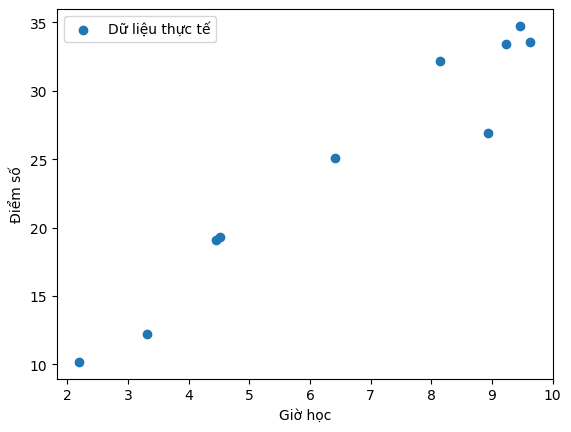

Epoch 10: Loss = 6.1985626220703125
Epoch 20: Loss = 6.101217746734619
Epoch 30: Loss = 6.009093284606934
Epoch 40: Loss = 5.921907424926758
Epoch 50: Loss = 5.839390754699707
Epoch 60: Loss = 5.761292457580566
Epoch 70: Loss = 5.687382221221924
Epoch 80: Loss = 5.617437839508057
Epoch 90: Loss = 5.5512375831604
Epoch 100: Loss = 5.488584518432617


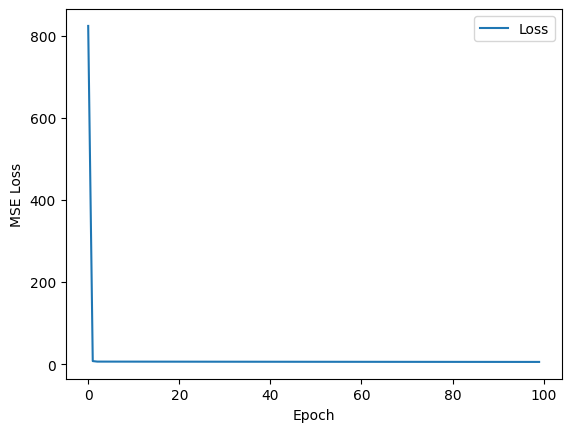

🔹 Giá trị cuối cùng của w: 3.4926841259002686
🔹 Giá trị cuối cùng của b: 1.1225351095199585


In [ ]:
# Bài tập về nhà 2
# Tạo một tập dữ liệu giả lập với x là số giờ học (ngẫu nhiên từ 1 - 10) và y là số điểm được tính theo công thức:
# y = 3x + 5 + noise
# Với noise là một giá trị ngẫu nhiên nhỏ.
# Yêu cầu:
# 	1.	Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True.
# 	2.	Tính MSE (Mean Squared Error).
# 	3.	Tính gradient.
# 	4.	Cập nhật tham số w và b bằng Gradient Descent với Learning Rate \alpha = 0.01.
# 	5.	Lặp lại quá trình trên trong 100 vòng lặp và quan sát sự hội tụ của mô hình.

# Import thư viện cần thiết
import torch
import numpy as np
import matplotlib.pyplot as plt

# Bước 1: Tạo tập dữ liệu giả lập
np.random.seed(42)  # Để tái tạo kết quả giống nhau
torch.manual_seed(42)

# Tạo dữ liệu x (số giờ học) ngẫu nhiên từ 1 - 10
x = torch.FloatTensor(10).uniform_(1, 10)
noise = torch.randn(x.size()) * 2  # Tạo noise ngẫu nhiên nhỏ

# Tính y theo công thức y = 3x + 5 + noise
y = 3 * x + 5 + noise

# Hiển thị tập dữ liệu
plt.scatter(x.numpy(), y.numpy(), label="Dữ liệu thực tế")
plt.xlabel("Giờ học")
plt.ylabel("Điểm số")
plt.legend()
plt.show()

# Bước 2: Khởi tạo tham số w và b ngẫu nhiên với requires_grad=True
w = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

# Learning Rate và số vòng lặp
alpha = 0.01
epochs = 100

# Lưu lại lịch sử lỗi để vẽ biểu đồ
loss_history = []

# Bước 5: Lặp quá trình Gradient Descent
for epoch in range(epochs):
    # Bước 3: Dự đoán y_hat = wx + b
    y_pred = w * x + b

    # Bước 4: Tính hàm mất mát MSE
    loss = torch.mean((y_pred - y) ** 2)
    loss_history.append(loss.item())

    # Tính gradient
    loss.backward()

    # Cập nhật w và b theo Gradient Descent
    with torch.no_grad():
        w -= alpha * w.grad
        b -= alpha * b.grad

    # Xóa gradient cũ để tránh lỗi tích lũy
    w.grad.zero_()
    b.grad.zero_()

    # In lỗi sau mỗi 10 vòng lặp
    if (epoch + 1) % 10 == 0:
        print(f"Epoch {epoch+1}: Loss = {loss.item()}")

# Biểu đồ hội tụ của loss
plt.plot(range(epochs), loss_history, label="Loss")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.legend()
plt.show()

# In kết quả cuối cùng của w và b
print(f"🔹 Giá trị cuối cùng của w: {w.item()}")
print(f"🔹 Giá trị cuối cùng của b: {b.item()}")

In [ ]:
## pytorch with tensor

In [ ]:
import torch
import numpy as np
print(torch.__version__)  # Kiểm tra phiên bản PyTorch

2.5.1+cu124


In [ ]:
arr = np.array([1, 2, 3, 4, 5])
print(arr)
print(arr.dtype)  # int64
print(type(arr))  # <class 'numpy.ndarray'>

x = torch.from_numpy(arr)
print(x)
print(x.dtype)  # torch.int64
print(x.type())  # torch.LongTensor

[1 2 3 4 5]
int64
<class 'numpy.ndarray'>
tensor([1, 2, 3, 4, 5])
torch.int64
torch.LongTensor


In [ ]:
arr2 = np.arange(0., 12.).reshape(4, 3)
print(arr2)

x2 = torch.from_numpy(arr2)
print(x2)
print(x2.type())  # torch.DoubleTensor

[[ 0.  1.  2.]
 [ 3.  4.  5.]
 [ 6.  7.  8.]
 [ 9. 10. 11.]]
tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]], dtype=torch.float64)
torch.DoubleTensor


In [ ]:
arr = np.arange(0, 5)
x = torch.from_numpy(arr)
print(x)

arr[0] = 99  # Thay đổi giá trị của mảng NumPy
print(x)  # Giá trị của tensor cũng thay đổi vì `from_numpy` sử dụng chung bộ nhớ với NumPy

arr = np.arange(0, 5)
x = torch.tensor(arr)  # Tạo tensor mới từ NumPy nhưng không chia sẻ bộ nhớ
print(x)

arr[0] = 99
print(x)  # Tensor không thay đổi

tensor([0, 1, 2, 3, 4])
tensor([99,  1,  2,  3,  4])
tensor([0, 1, 2, 3, 4])
tensor([0, 1, 2, 3, 4])


### BTVN 3: Giải thích lý do tại sao cho 2 trường hợp trên
1. Chia sẻ bộ nhớ
torch.from_numpy(): Tensor được tạo ra chia sẻ bộ nhớ với mảng NumPy. Điều này có nghĩa là nếu thay đổi giá trị trong mảng NumPy, tensor cũng sẽ bị ảnh hưởng.
torch.tensor(): Tensor được tạo ra là một bản sao độc lập của mảng NumPy. Thay đổi mảng NumPy sẽ không ảnh hưởng đến tensor.
2. Hiệu ứng khi thay đổi NumPy
torch.from_numpy(): Khi thay đổi giá trị trong mảng NumPy, tensor cũng sẽ thay đổi vì cả hai chia sẻ cùng một vùng nhớ.
Ví dụ:

arr = np.array([1, 2, 3])  
x = torch.from_numpy(arr)  
arr[0] = 99  
print(x)  # tensor([99, 2, 3])
torch.tensor(): Khi thay đổi giá trị trong mảng NumPy, tensor không bị ảnh hưởng vì dữ liệu đã được sao chép.
Ví dụ:

arr = np.array([1, 2, 3])  
x = torch.tensor(arr)  
arr[0] = 99  
print(x)  # tensor([1, 2, 3])
3. Sử dụng bộ nhớ
torch.from_numpy(): Tiết kiệm bộ nhớ hơn vì tensor và mảng NumPy chia sẻ cùng một vùng nhớ.
torch.tensor(): Tốn bộ nhớ hơn vì phải sao chép toàn bộ dữ liệu từ NumPy sang tensor.
4. Kết quả ban đầu
Với cả hai cách, ban đầu tensor đều giống mảng NumPy.
Ví dụ:
python
Sao chép mã
arr = np.array([0, 1, 2])  
print(torch.from_numpy(arr))  # tensor([0, 1, 2])  
print(torch.tensor(arr))      # tensor([0, 1, 2])
5. Kết quả sau khi thay đổi NumPy
torch.from_numpy(): Tensor cũng sẽ phản ánh sự thay đổi của mảng NumPy.

Ví dụ:
arr[0] = 99  
print(x)  # tensor([99, 1, 2])
torch.tensor(): Tensor sẽ không bị ảnh hưởng bởi sự thay đổi đó.

Ví dụ:
arr[0] = 99  
print(x)  # tensor([0, 1, 2])
Kết luận
Dùng torch.from_numpy() khi bạn cần chia sẻ bộ nhớ để tiết kiệm tài nguyên và chấp nhận rằng thay đổi trong NumPy sẽ làm thay đổi tensor.
Dùng torch.tensor() khi bạn cần sự độc lập hoàn toàn giữa NumPy và tensor để tránh bị ảnh hưởng bởi các thay đổi sau đó.





In [ ]:
# BTVN 4: bạn hãy giúp thầy về nhà tạo tensor với:
# - Empty
# - Zeros
# - Ones
# - Random
# - Reshape với view và view as
import torch

# 1. Tạo tensor rỗng (empty)
empty_tensor = torch.empty(3, 3)  # Tạo tensor 3x3 với giá trị chưa khởi tạo
print("Empty Tensor:")
print(empty_tensor)

# 2. Tạo tensor toàn số 0 (zeros)
zeros_tensor = torch.zeros(3, 3)  # Tạo tensor 3x3 chứa toàn số 0
print("\nZeros Tensor:")
print(zeros_tensor)

# 3. Tạo tensor toàn số 1 (ones)
ones_tensor = torch.ones(3, 3)  # Tạo tensor 3x3 chứa toàn số 1
print("\nOnes Tensor:")
print(ones_tensor)

# 4. Tạo tensor với giá trị ngẫu nhiên (rand)
random_tensor = torch.rand(3, 3)  # Tạo tensor 3x3 với giá trị ngẫu nhiên trong khoảng [0,1]
print("\nRandom Tensor:")
print(random_tensor)

# 5. Thay đổi kích thước tensor với view() và view_as()
x = torch.arange(12)  # Tạo tensor 1D có 12 phần tử từ 0 đến 11
reshaped_tensor = x.view(3, 4)  # Reshape thành (3x4)
print("\nReshaped Tensor (using view):")
print(reshaped_tensor)

y = torch.zeros_like(reshaped_tensor)  # Tạo tensor có cùng kích thước với reshaped_tensor
new_tensor = x.view_as(y)  # Reshape x theo kích thước của y
print("\nTensor Reshaped Using view_as:")
print(new_tensor)

Empty Tensor:
tensor([[3.7835e-44, 3.9236e-44, 1.4013e-43],
        [2.8026e-45, 1.4013e-45, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 0.0000e+00]])

Zeros Tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

Ones Tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

Random Tensor:
tensor([[0.9781, 0.4617, 0.3202],
        [0.3912, 0.1395, 0.2435],
        [0.1187, 0.5692, 0.5960]])

Reshaped Tensor (using view):
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

Tensor Reshaped Using view_as:
tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])


In [ ]:
def mean_confidence_interval(lower_limits, upper_limits, counts, confidence_level):
    # Lọc bỏ giá trị None
    valid_lower = [x for x in lower_limits if x is not None]
    valid_upper = [x for x in upper_limits if x is not None]

    # Tính trung bình của các giá trị hợp lệ
    lower_mean = sum(valid_lower) / len(valid_lower) if valid_lower else 0
    upper_mean = sum(valid_upper) / len(valid_upper) if valid_upper else 0

    return lower_mean, upper_mean

In [ ]:
def main():
    # Chiều cao giới hạn dưới và trên tương ứng cho mỗi nhóm và số lượng cây trong mỗi nhóm
    lower_limits = [None, 180, 190, 200, 210, 220, 230]
    upper_limits = [180, 190, 200, 210, 220, 230, None]
    counts = [3, 12, 35, 70, 62, 33, 8]
    confidence_level = 0.99

    lower_bound, upper_bound = mean_confidence_interval(lower_limits, upper_limits, counts, confidence_level)
    print(f'\nKhoảng ước lượng trung bình chiều cao cây với độ tin cậy {confidence_level * 100}%: '
          f'({lower_bound:.3f}, {upper_bound:.3f})')

main()


Khoảng ước lượng trung bình chiều cao cây với độ tin cậy 99.0%: (205.000, 205.000)
